In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

In [54]:
r2_cgcnn = []
r2_roost = []
r2_lr = []
r2_rf = []
r2_gbt = []
mae_cgcnn=[]
mae_roost=[]
mae_lr = []
mae_rf = []
mae_gbt = []
for i in (3,2,1):
    cgcnn_result = pd.read_csv(f'./cgcnn_result/test_results_{i}.csv',header=None)
    roost_result = pd.read_csv(f'./roost/roost_result{i}.csv')
    lr_result = pd.read_csv(f'./lr_result/lr_result{i}')
    rf_result = pd.read_csv(f'./rf_result/rf_result{i}')
    gbt_result = pd.read_csv(f'./gbt_result/gbt_result{i}')



    r2_cgcnn.append(r2_score(cgcnn_result[2],cgcnn_result[1]))
    r2_roost.append(r2_score(roost_result['tc_pred_n0'],roost_result['tc_target']))
    r2_lr.append(r2_score(lr_result['label'],lr_result['prediction']))
    r2_rf.append(r2_score(rf_result['label'],rf_result['prediction']))
    r2_gbt.append(r2_score(gbt_result['label'],gbt_result['prediction']))

    mae_cgcnn.append(mae(cgcnn_result[2],cgcnn_result[1]))
    mae_roost.append(mae(roost_result['tc_pred_n0'],roost_result['tc_target']))
    mae_lr.append(mae(lr_result['label'],lr_result['prediction']))
    mae_rf.append(mae(rf_result['label'],rf_result['prediction']))
    mae_gbt.append(mae(gbt_result['label'],gbt_result['prediction']))

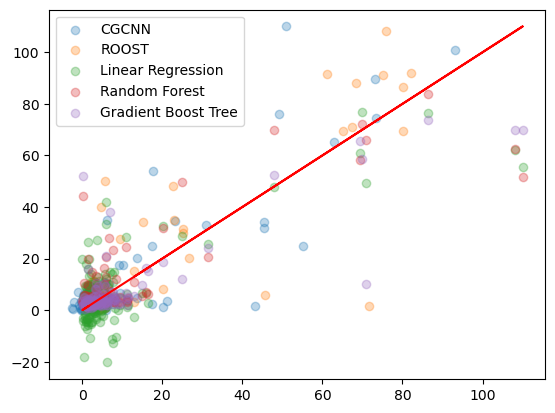

In [55]:
plt.scatter(cgcnn_result[2],cgcnn_result[1],label='CGCNN',alpha=0.3)
plt.scatter(roost_result['tc_pred_n0'],roost_result['tc_target'],label='ROOST',alpha=0.3)
plt.scatter(lr_result['label'],lr_result['prediction'],label='Linear Regression',alpha=0.3)
plt.scatter(rf_result['label'],rf_result['prediction'],label='Random Forest',alpha=0.3)
plt.scatter(gbt_result['label'],gbt_result['prediction'],label='Gradient Boost Tree',alpha=0.3)
plt.plot(lr_result['label'],lr_result['label'],c='r')
plt.legend()



Text(0.5, 1.0, 'R2 score')

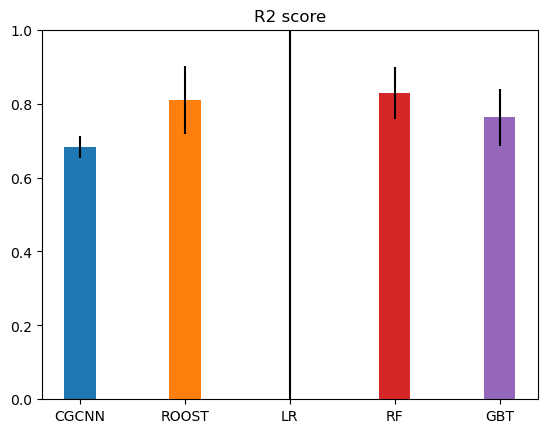

In [59]:
std_cgcnn = np.std(r2_cgcnn)
std_roost = np.std(r2_roost)
std_lr = np.std(r2_lr)
std_rf = np.std(r2_rf)
std_gbt = np.std(r2_gbt)




plt.bar('CGCNN',np.mean(r2_cgcnn),width=0.3,yerr = std_cgcnn)
plt.bar('ROOST',np.mean(r2_roost),width=0.3,yerr = std_roost)
plt.bar('LR',np.mean(r2_lr),width=0.3,yerr = std_lr)
plt.bar('RF',np.mean(r2_rf),width=0.3,yerr = std_rf)
plt.bar('GBT',np.mean(r2_gbt),width=0.3,yerr = std_gbt)
plt.ylim(0,1)
plt.title("R2 score")




Text(0.5, 1.0, 'Mean Absolute Error')

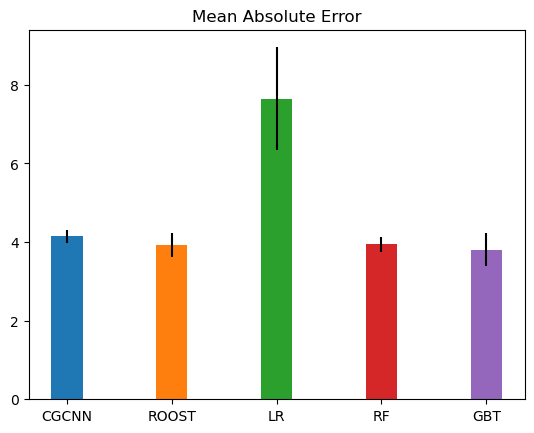

In [58]:
mae_std_cgcnn = np.std(mae_cgcnn)
mae_std_roost = np.std(mae_roost)
mae_std_lr = np.std(mae_lr)
mae_std_rf = np.std(mae_rf)
mae_std_gbt = np.std(mae_gbt)




plt.bar('CGCNN',np.mean(mae_cgcnn),width=0.3,yerr = mae_std_cgcnn)
plt.bar('ROOST',np.mean(mae_roost),width=0.3,yerr = mae_std_roost)
plt.bar('LR',np.mean(mae_lr),width=0.3,yerr = mae_std_lr)
plt.bar('RF',np.mean(mae_rf),width=0.3,yerr = mae_std_rf)
plt.bar('GBT',np.mean(mae_gbt),width=0.3,yerr = mae_std_gbt)
plt.title("Mean Absolute Error")